In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

# INTRO to GG

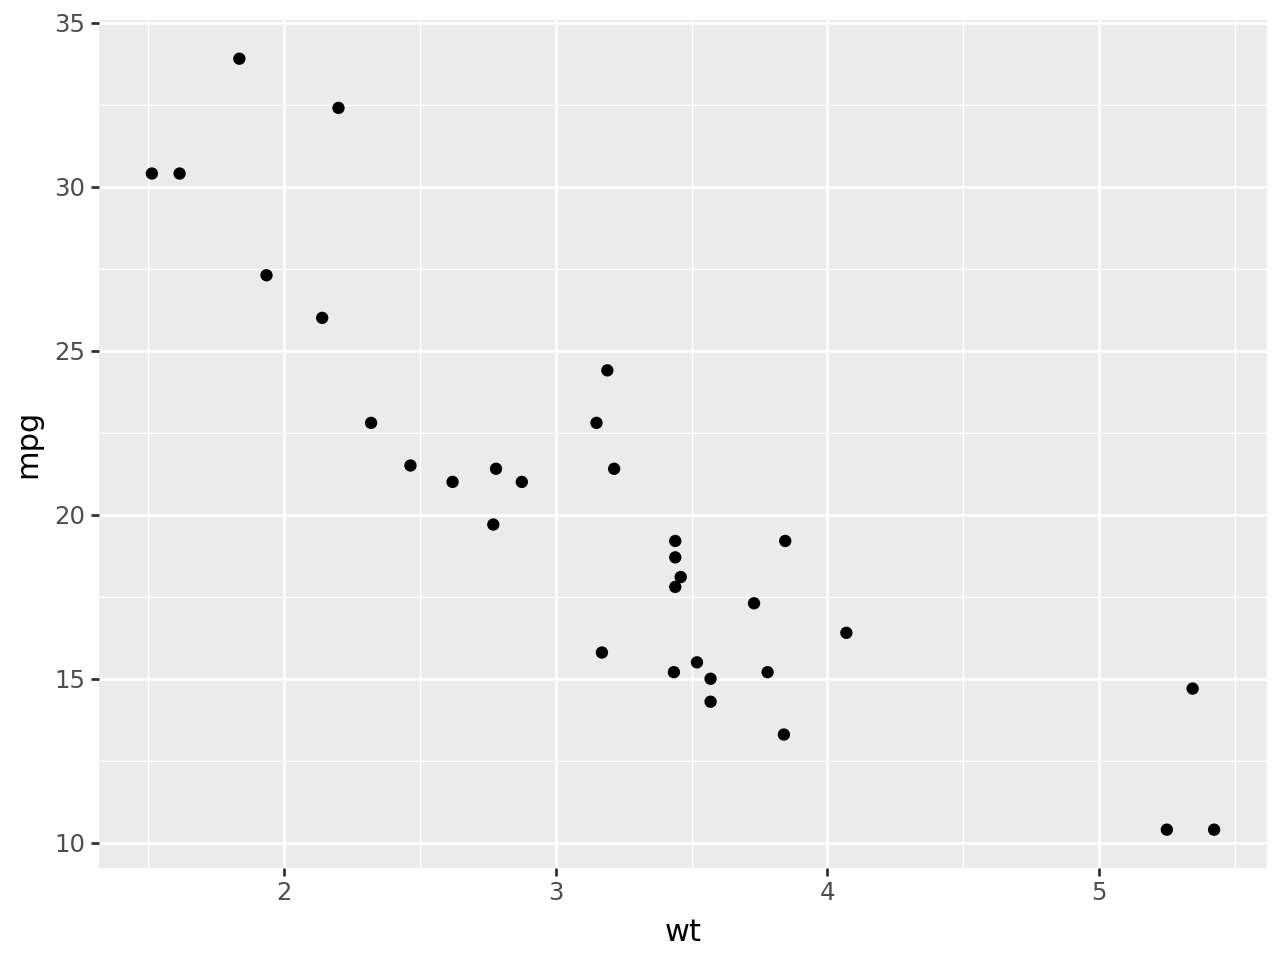

In [2]:
(ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point())

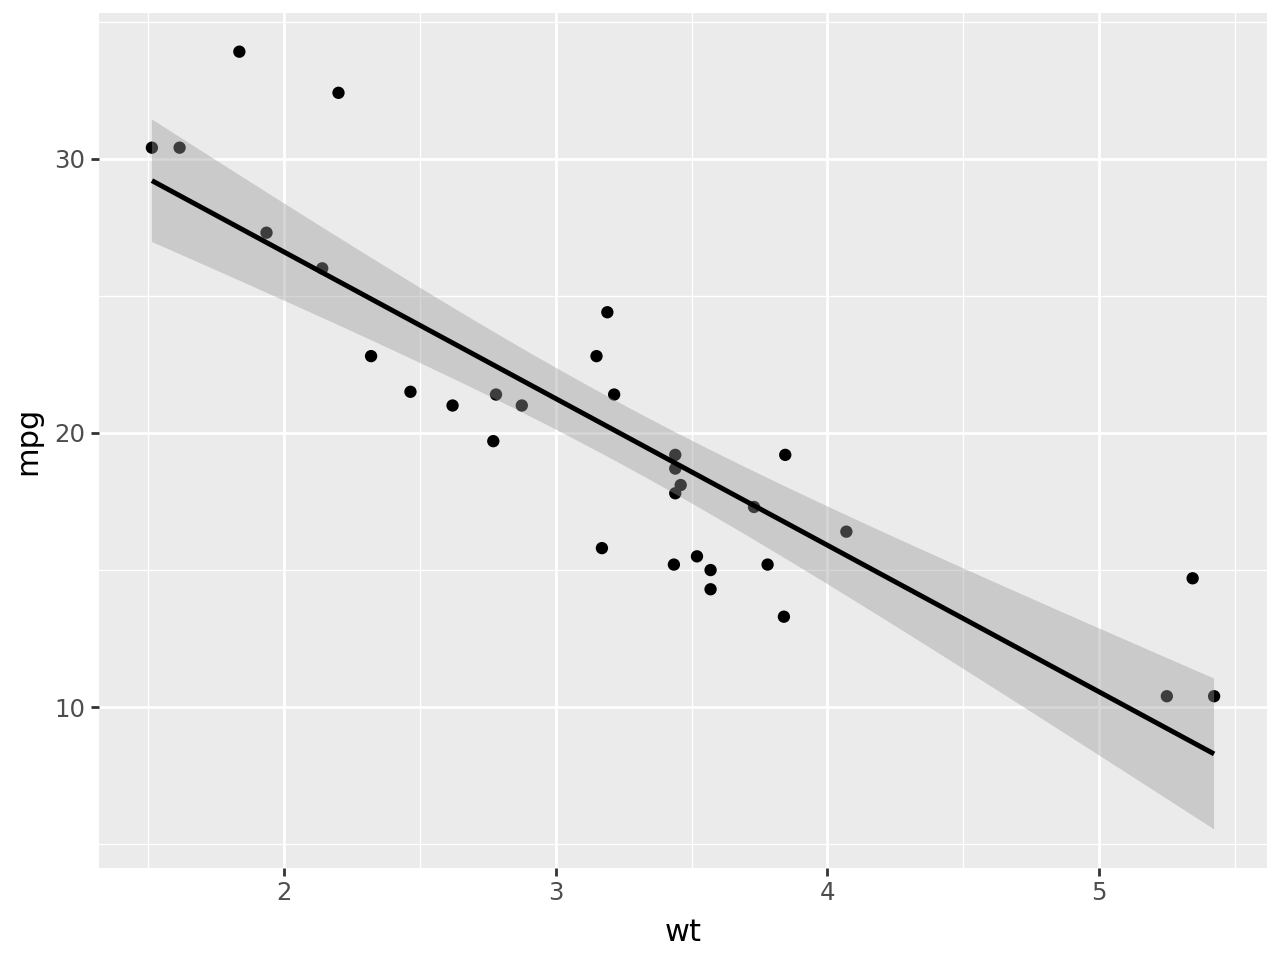

In [3]:
(ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point() +
stat_smooth(method = "lm"))

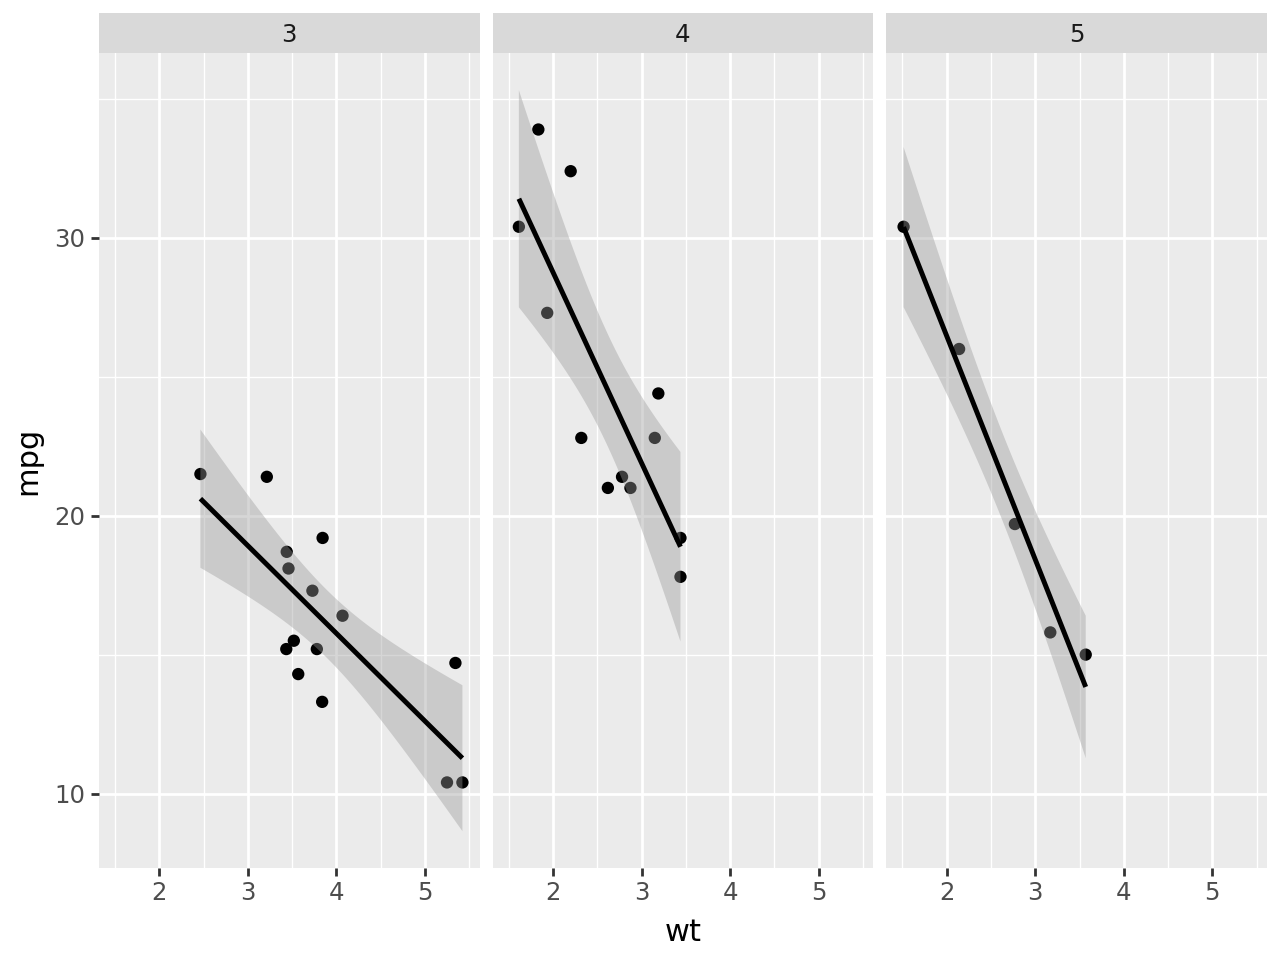

In [4]:
(ggplot(mtcars, aes(x = "wt", y = "mpg")) + geom_point() +
stat_smooth(method = "lm") +
facet_wrap("~gear"))

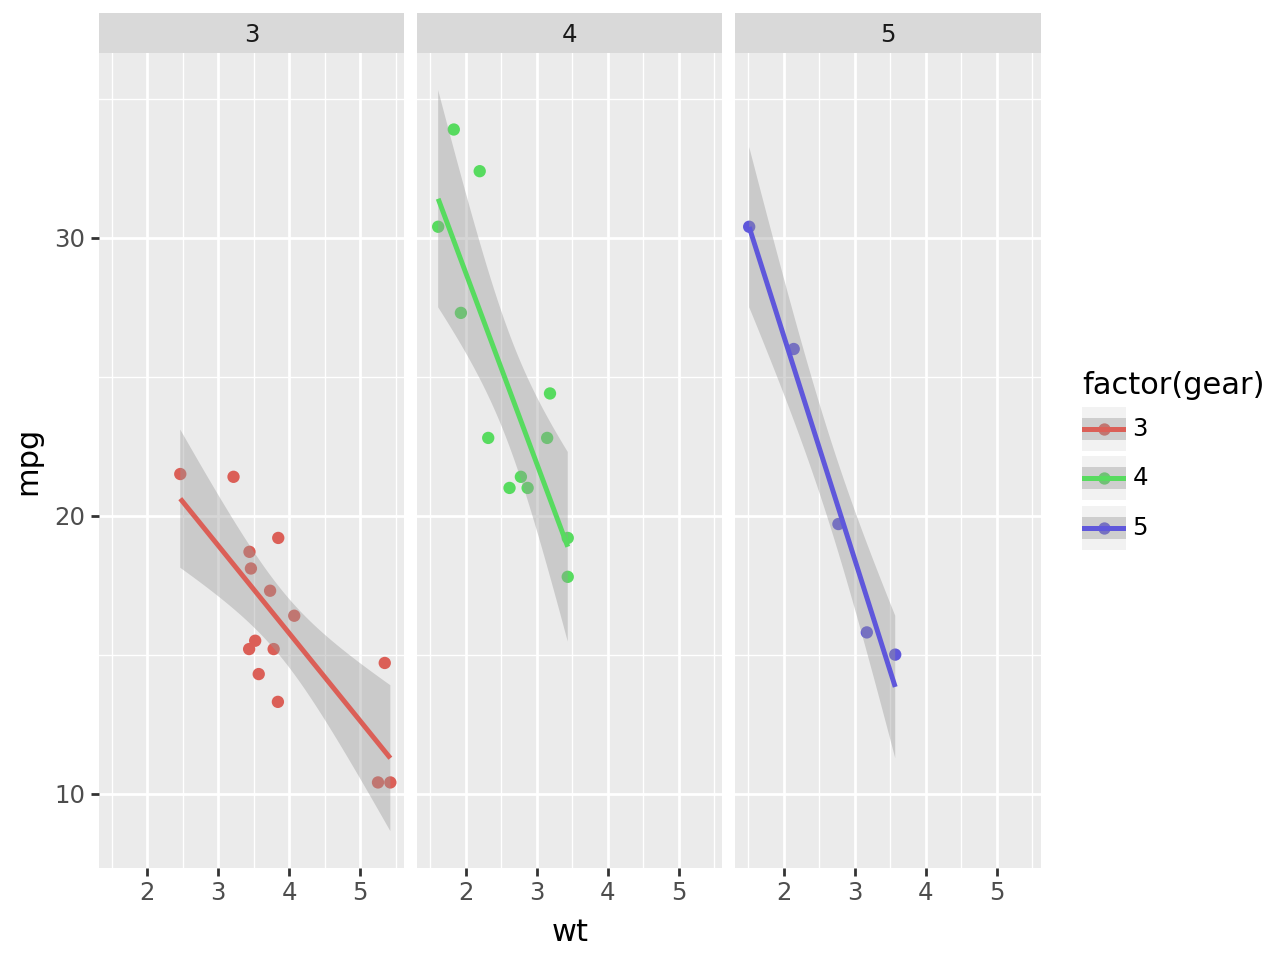

In [5]:
(ggplot(mtcars, aes(x = "wt", y = "mpg", color = "factor(gear)")) + geom_point() +
stat_smooth(method = "lm") +
facet_wrap("~gear"))

In [6]:
penguin = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")
penguin.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# GG Basic Steps
## 1. Tell GG WHAT data you want to use

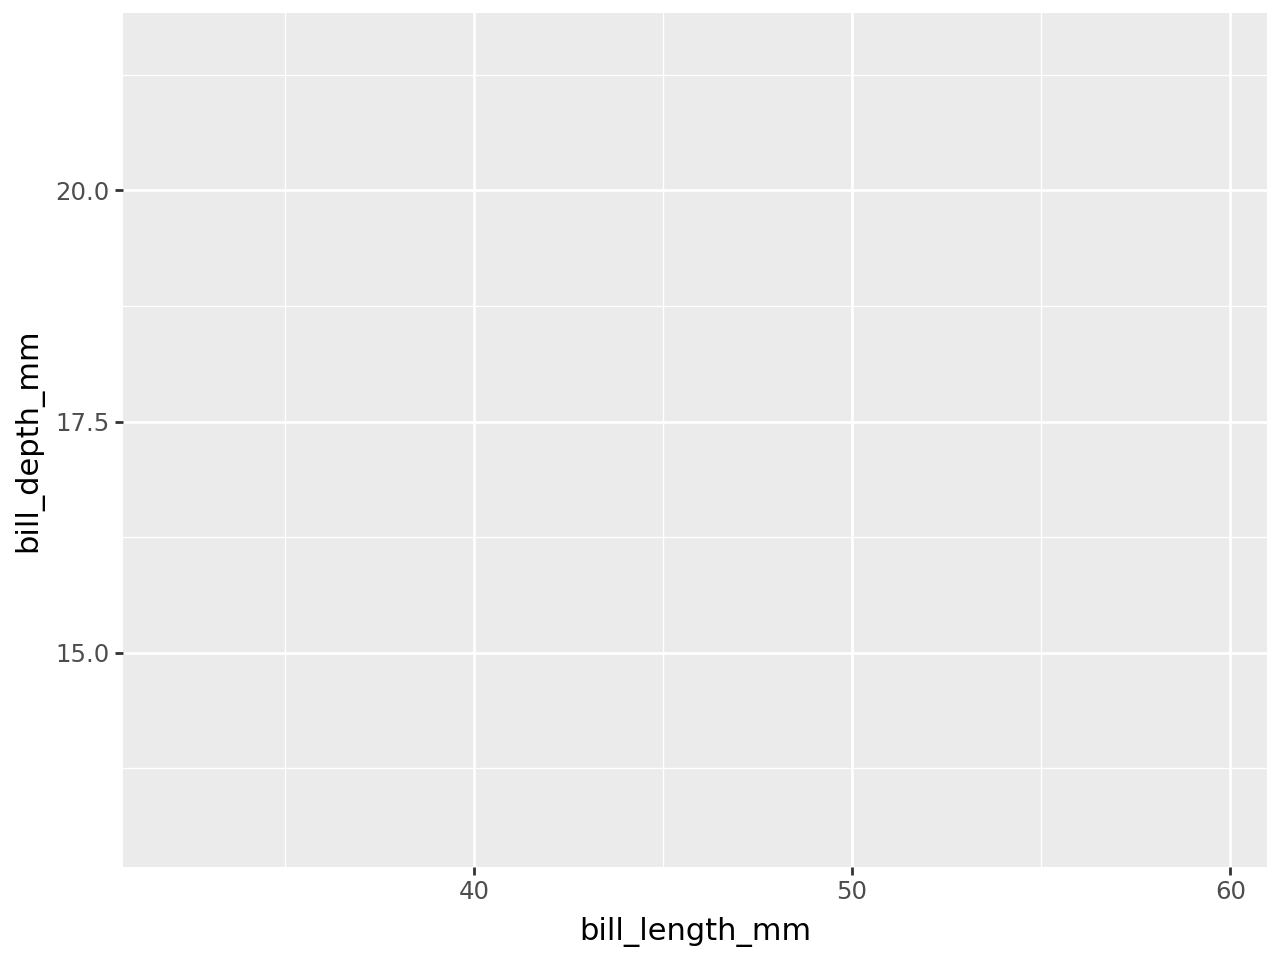

In [8]:
(ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")))

## 2. Tell GG HOW you want the data to show up

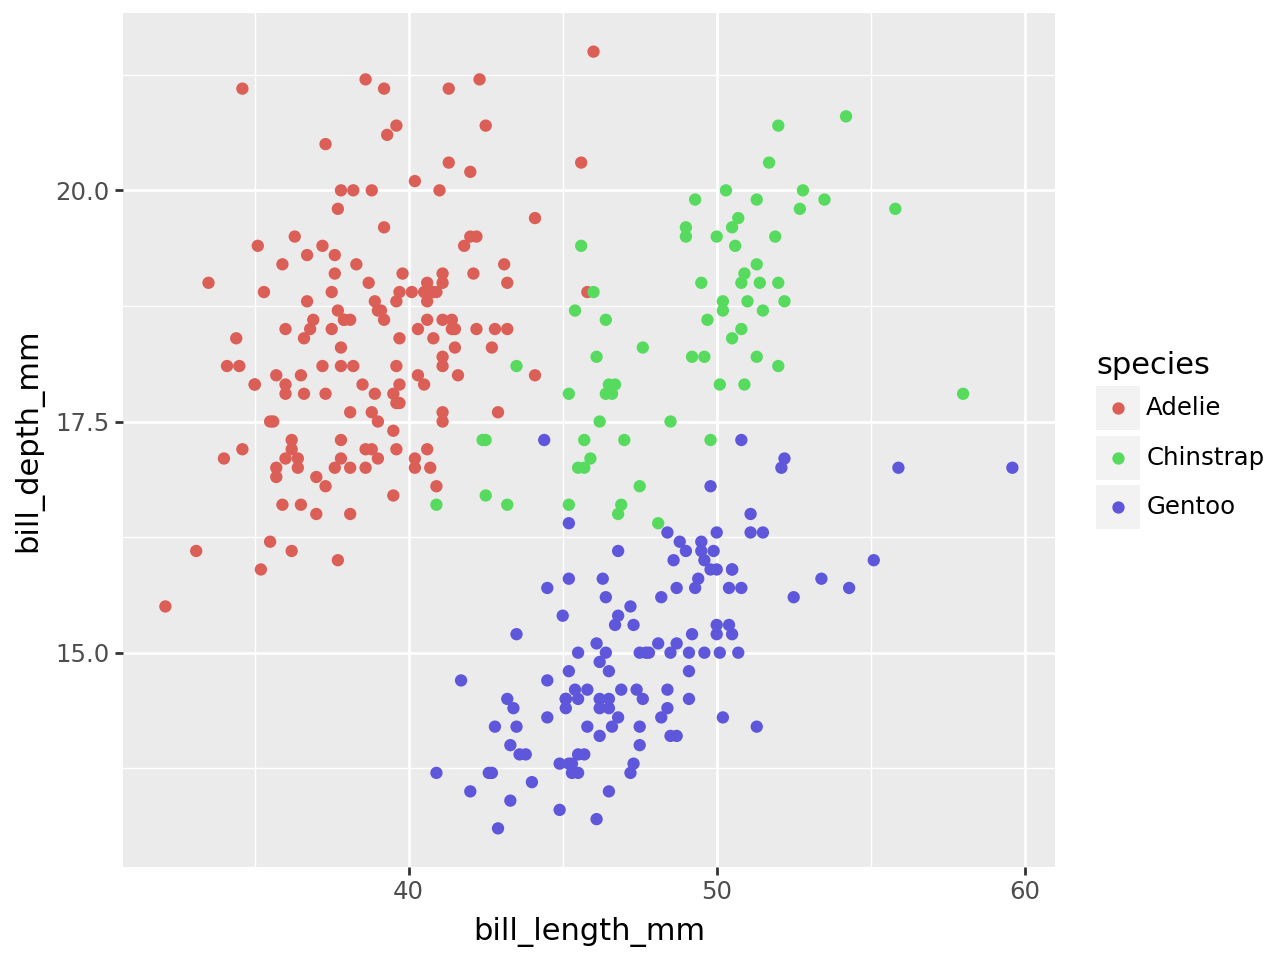

In [9]:
(ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + geom_point())

## 1. Tell GG WHAT data you want to use

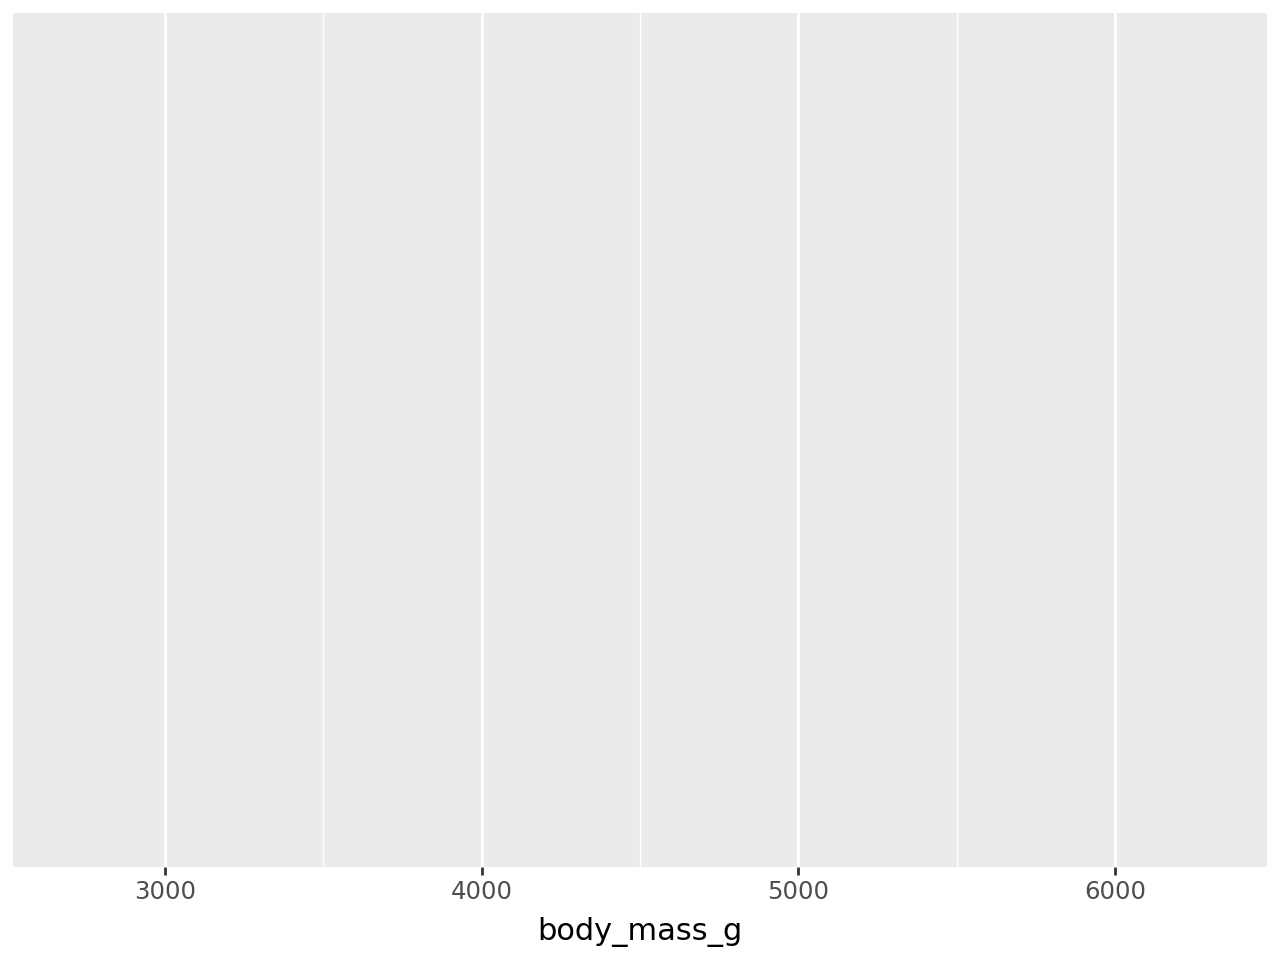

In [10]:
(ggplot(penguin, aes(x = "body_mass_g")))

## 2. Tell GG HOW you want the data to show up

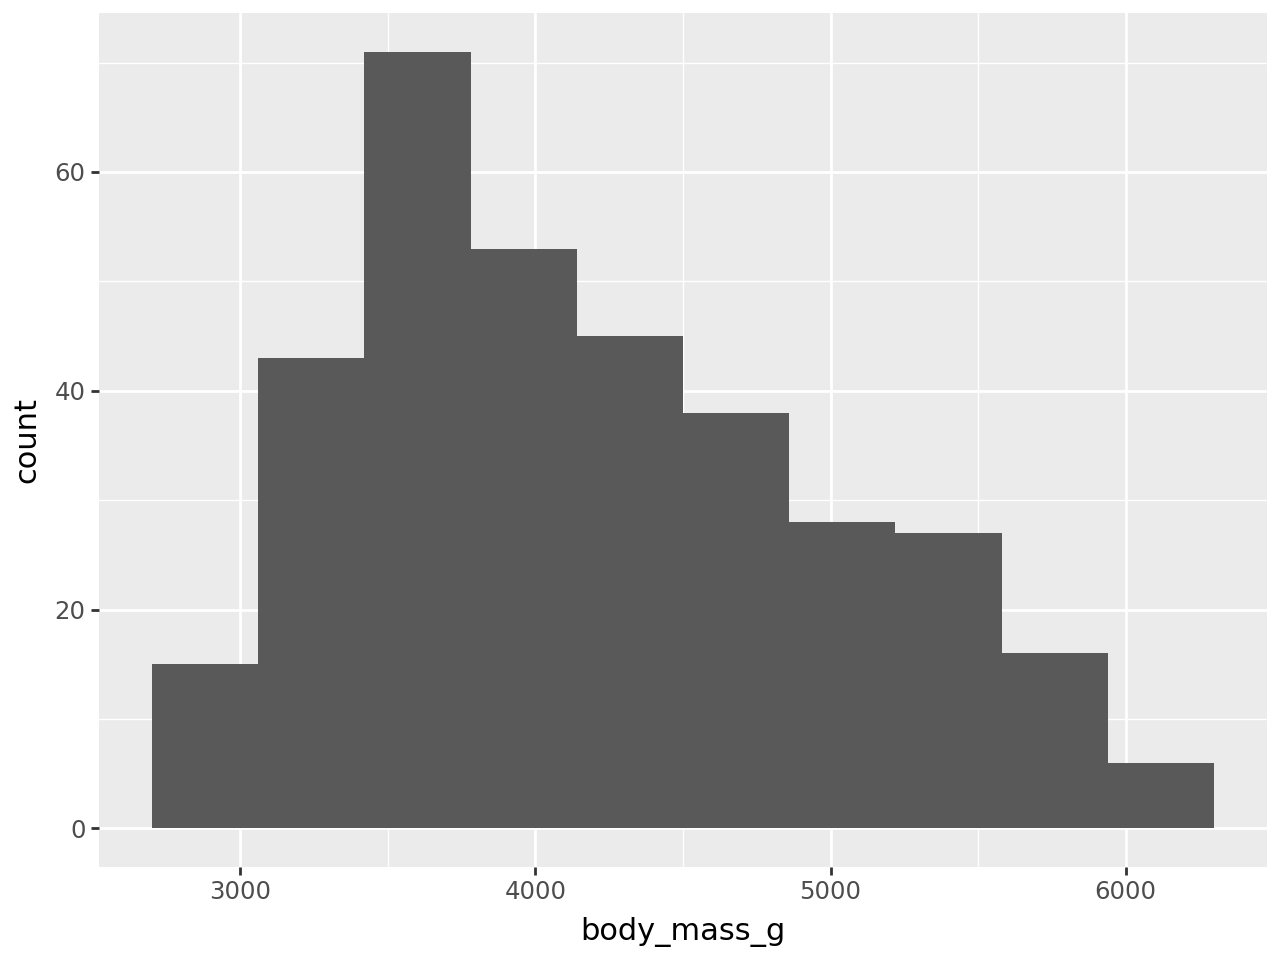

In [11]:
(ggplot(penguin, aes(x = "body_mass_g")) + geom_histogram())

## 1. Tell GG WHAT data you want to use

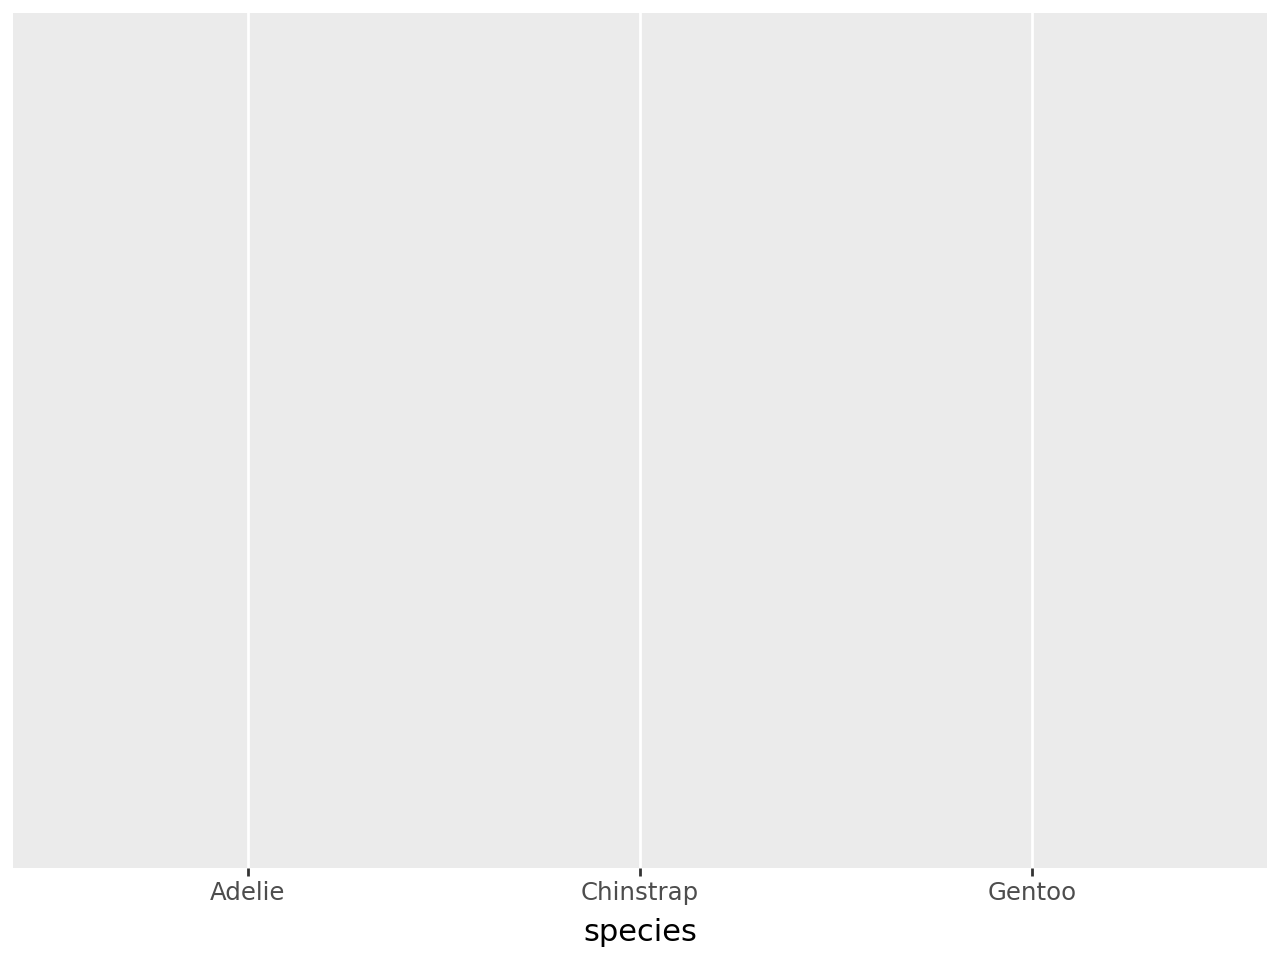

In [12]:
(ggplot(penguin, aes(x = "species")))

## 2. Tell GG HOW you want the data to show up

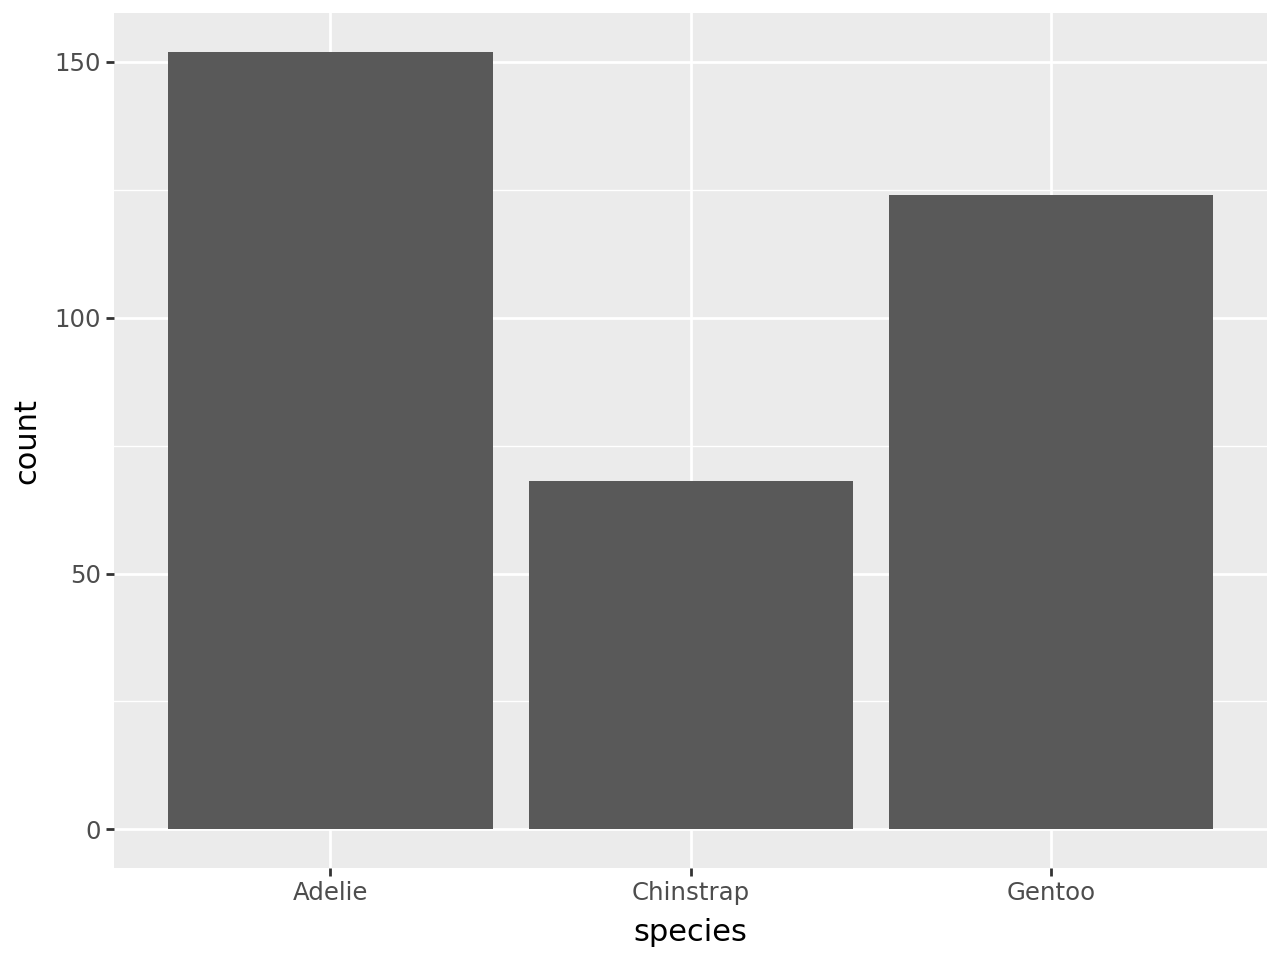

In [13]:
(ggplot(penguin, aes(x = "species")) + geom_bar())

## 1. Tell GG WHAT data you want to use

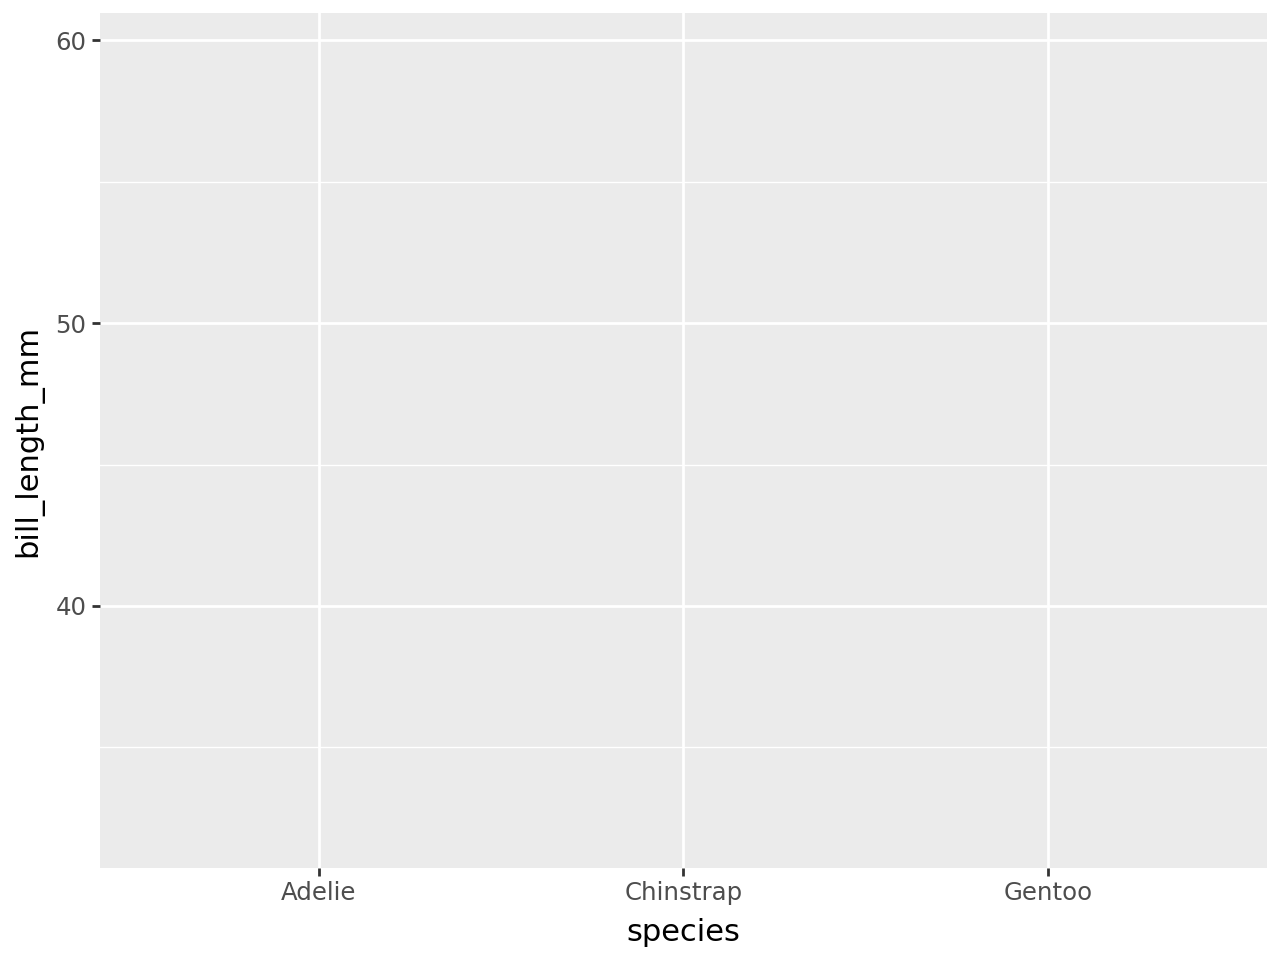

In [14]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm")))

## 2. Tell GG HOW you want the data to show up

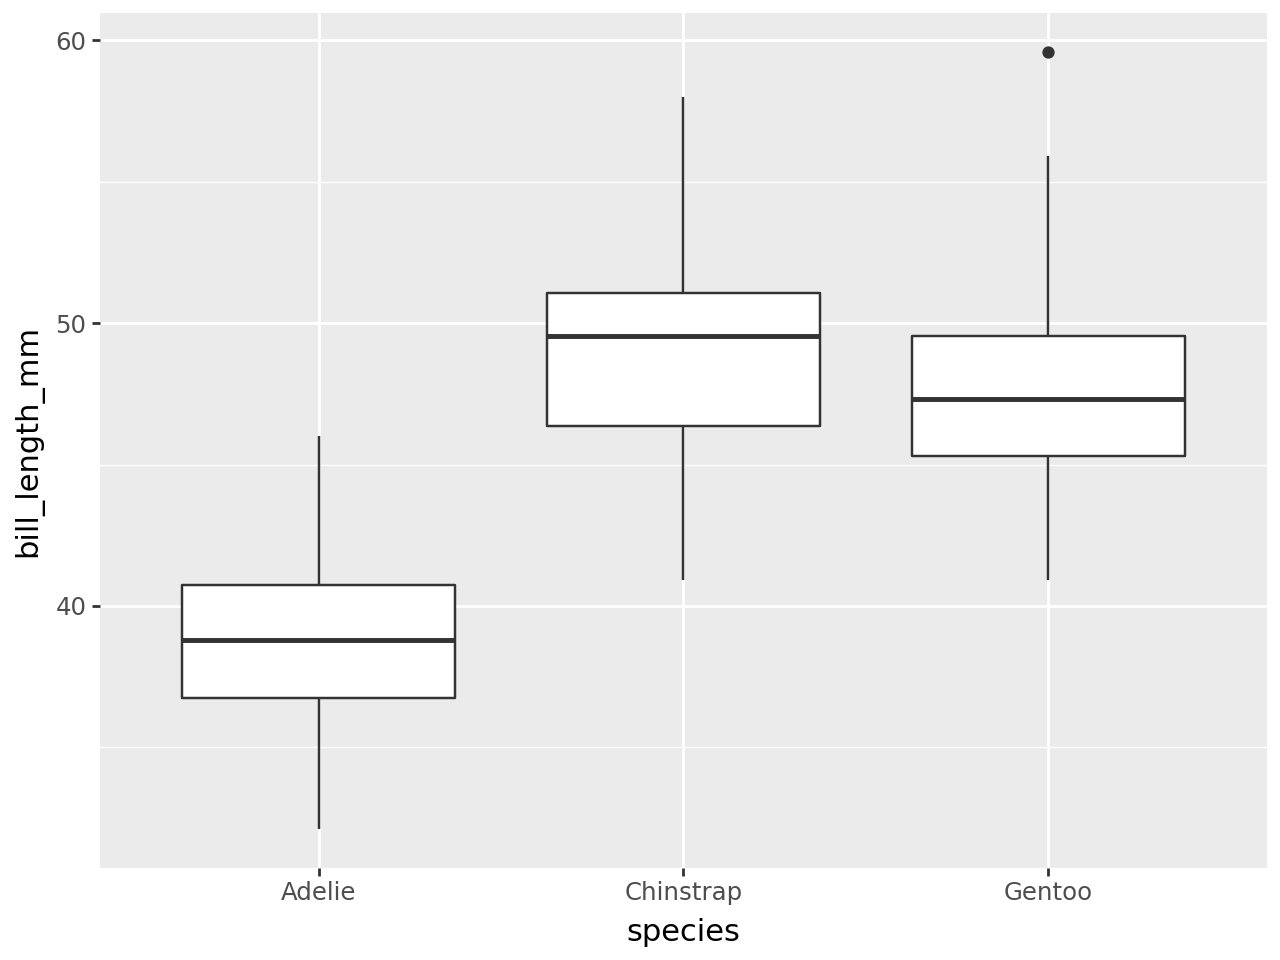

In [15]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm")) + geom_boxplot())

## 3. Extras

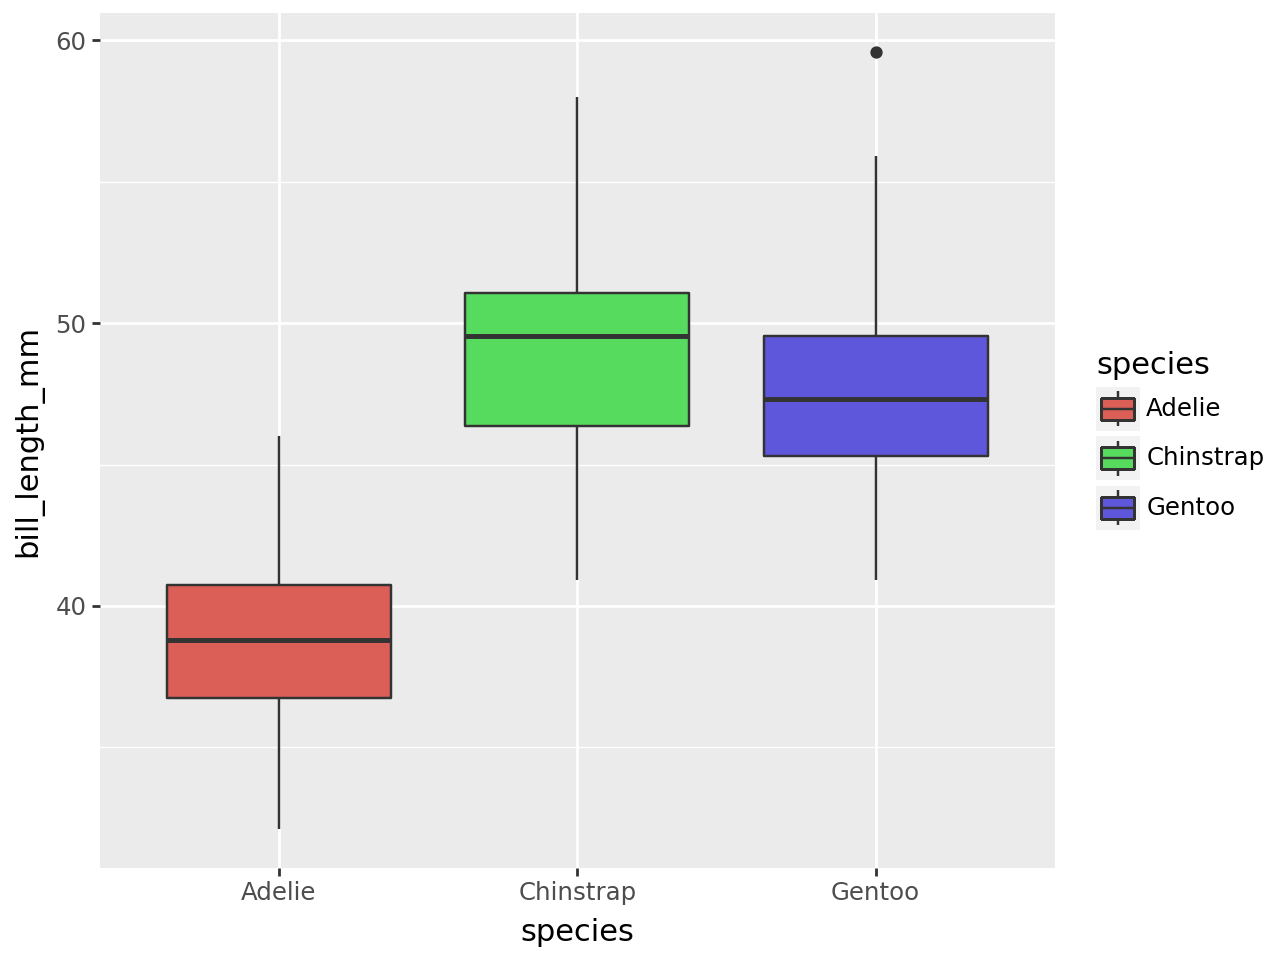

In [16]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm", fill = "species")) + geom_boxplot())

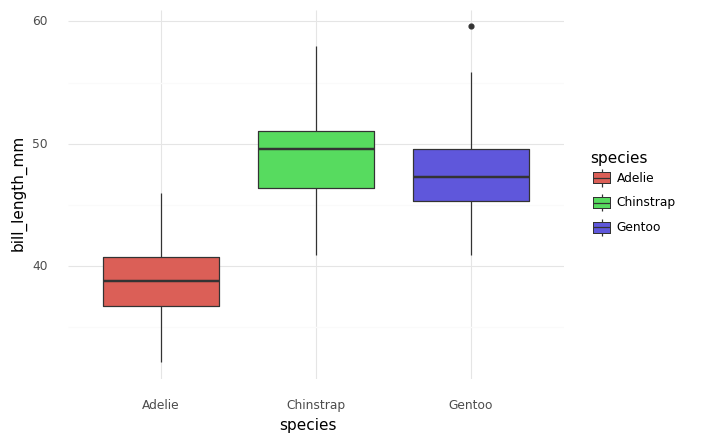

<ggplot: (341071217)>

In [ ]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm", fill = "species")) + geom_boxplot() + theme_minimal())

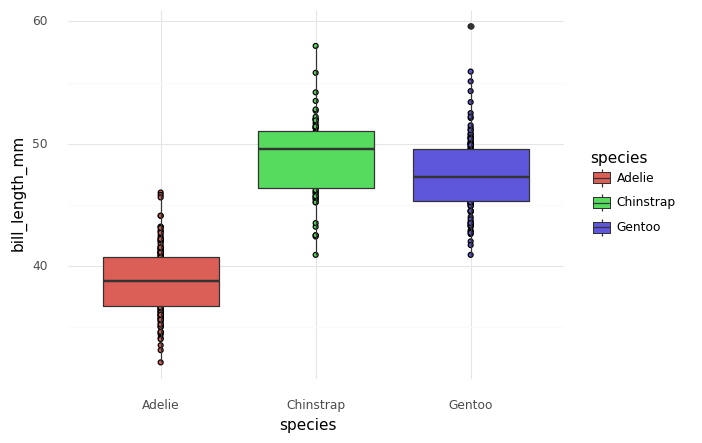

<ggplot: (341018509)>

In [ ]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm", fill = "species")) +
 geom_point() +
 geom_boxplot() + theme_minimal())

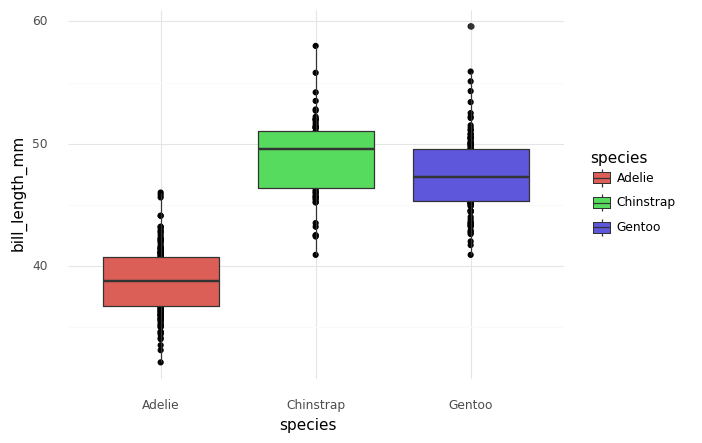

<ggplot: (341105875)>

In [ ]:
(ggplot(penguin, aes(x = "species", y = "bill_length_mm")) +
 geom_point() +
 geom_boxplot(aes(fill = "species")) + theme_minimal())

# Prepping Data for Barcharts


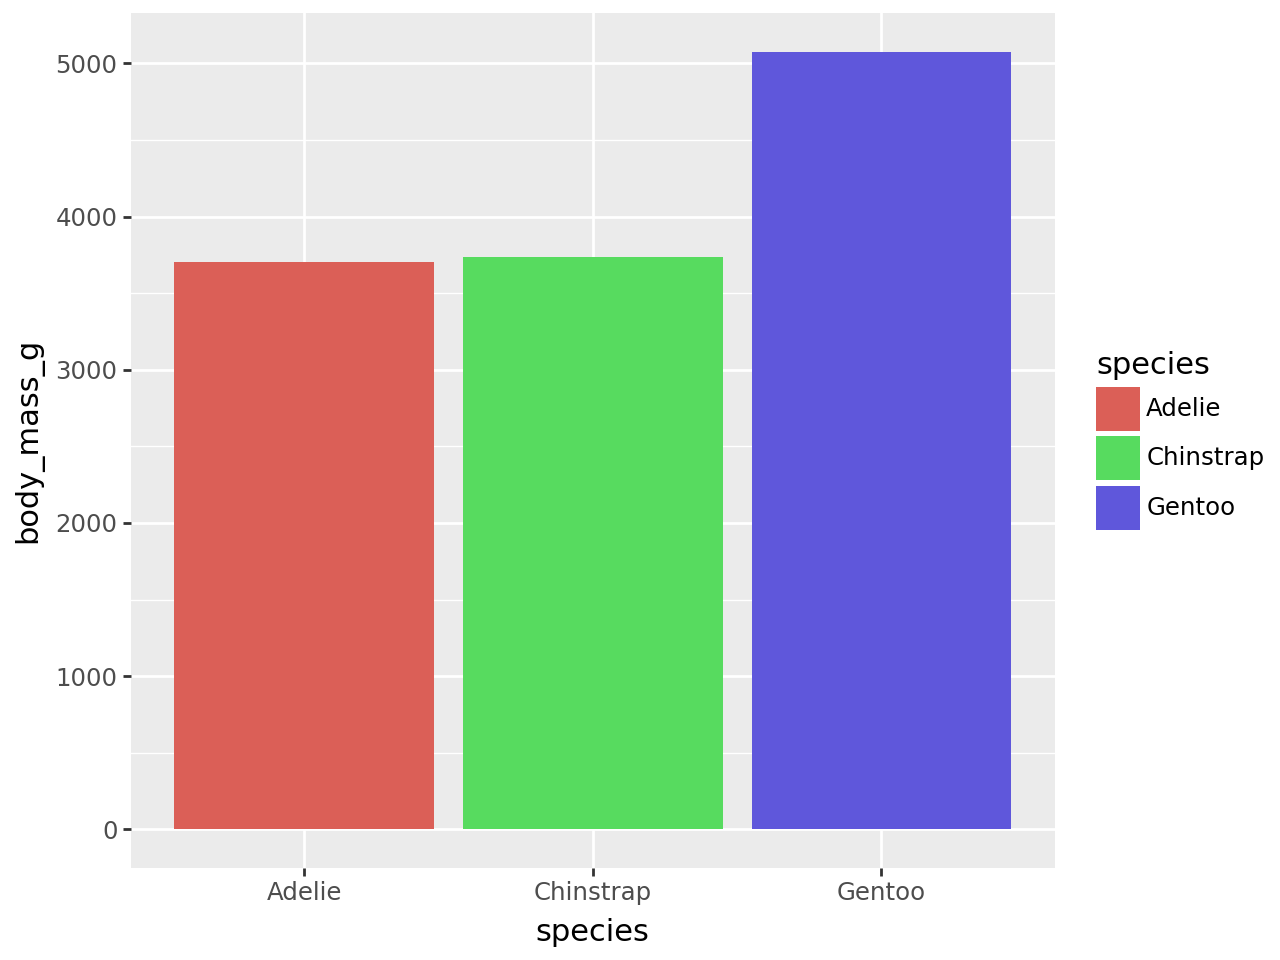

In [17]:
(ggplot(penguin, aes(x = "species", y = "body_mass_g", fill = "species")) +
stat_summary(fun_data = "mean_sdl", geom = "bar"))

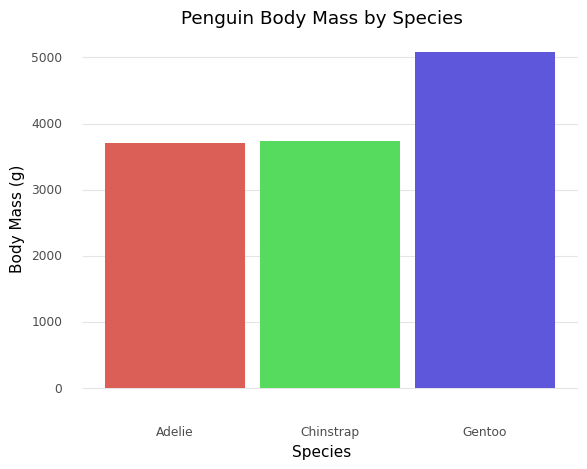

<ggplot: (-9223372036513633087)>

In [ ]:
(ggplot(penguin, aes(x = "species", y = "body_mass_g", fill = "species")) +
stat_summary(fun_data = "mean_sdl", geom = "bar") +
 labs(x = "Species", y = "Body Mass (g)") +
 ggtitle("Penguin Body Mass by Species") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none"))

In [ ]:
penguin_bill = penguin.groupby(["species"], as_index = False)["bill_length_mm"].mean()
penguin_bill

,species,bill_length_mm
0,Adelie,38.791391
1,Chinstrap,48.833824
2,Gentoo,47.504878


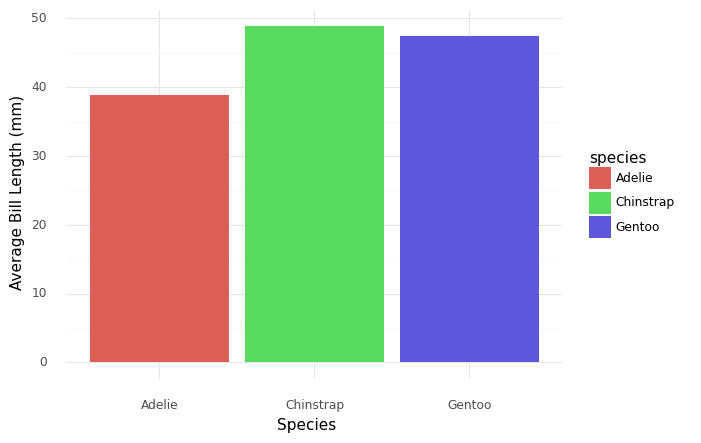

<ggplot: (340852109)>

In [ ]:
(ggplot(penguin_bill, aes(x = "species", y = "bill_length_mm", fill = "species")) +
geom_bar(stat = "identity") + theme_minimal() +
labs(x = "Species", y = "Average Bill Length (mm)"))

# NON Count Bar Charts
So far we've made bar charts with either counts (the default), or using `stat_summary()`. One other way we might want to make a bar chart is by specifying both the categorical variable for bars (x) and the height of the bars (y).

In [18]:
books = ["Home Before Dark", "The Wives", "You", "The Last Mrs. Parrish", "The Guest List", "Invisible Girl"]
ratings = [4.08,3.63,3.93,3.93, 3.85, 3.81]
book_df = pd.DataFrame({"books":books, "ratings": ratings})
book_df

,books,ratings
0,Home Before Dark,4.08
1,The Wives,3.63
2,You,3.93
3,The Last Mrs. Parrish,3.93
4,The Guest List,3.85
5,Invisible Girl,3.81


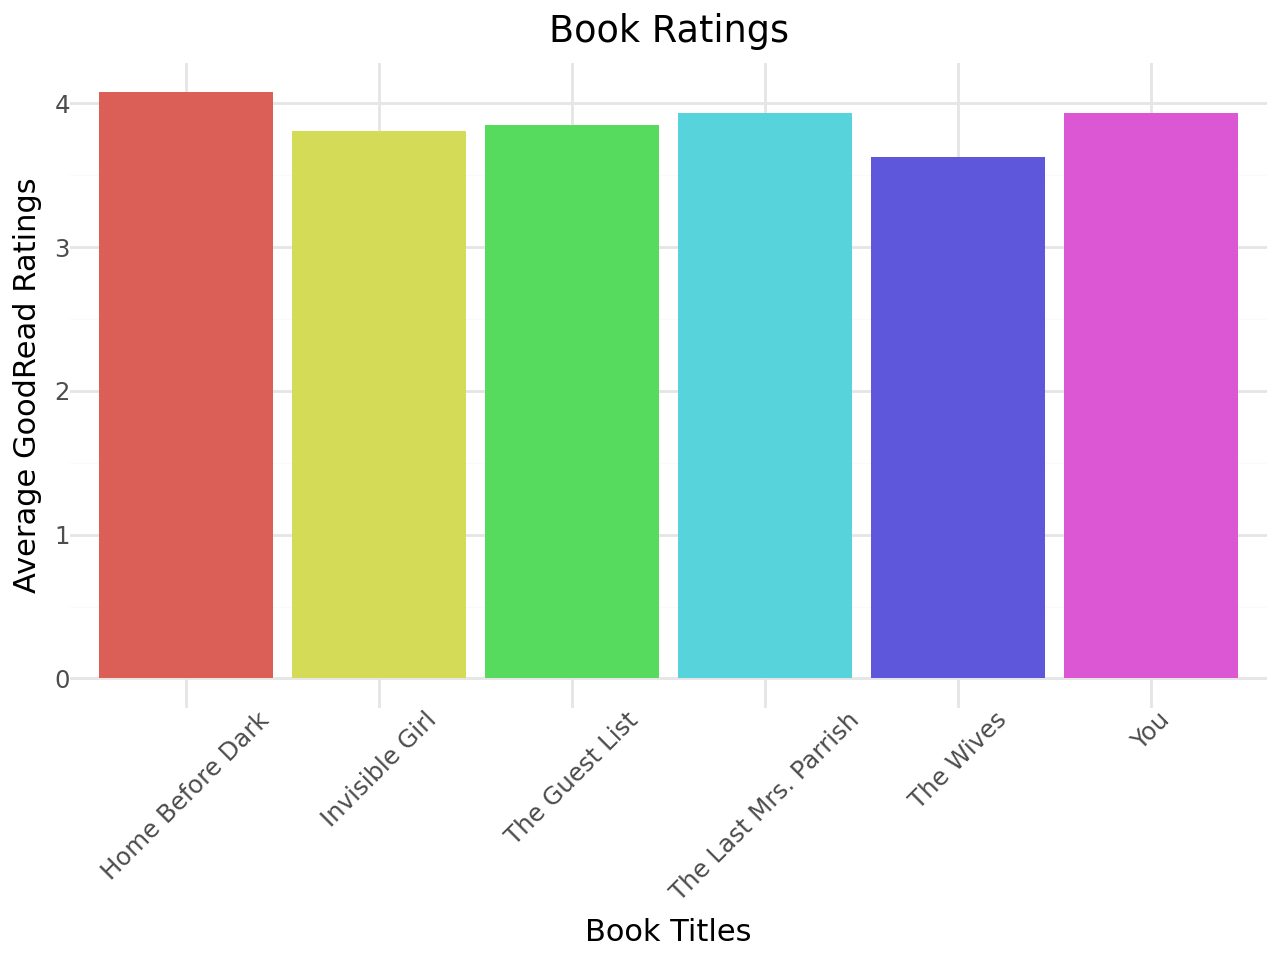

In [19]:
(ggplot(book_df, aes(x = "books", y = "ratings")) +
geom_bar(aes(fill = "books"), stat = "identity") +
theme_minimal() +
labs(title = "Book Ratings",
    x = "Book Titles",
    y = "Average GoodRead Ratings") +
theme(axis_text_x = element_text(angle = 45),
     legend_position = "none"))

# Let's Try to explore a new data set using Visualization!

In [20]:
cereal = pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


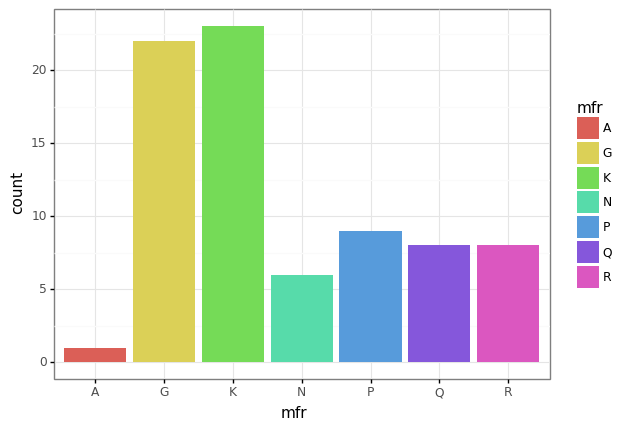

<ggplot: (340911396)>

In [ ]:
(ggplot(cereal, aes(x = "mfr", fill = "mfr")) + geom_bar() + theme_bw())

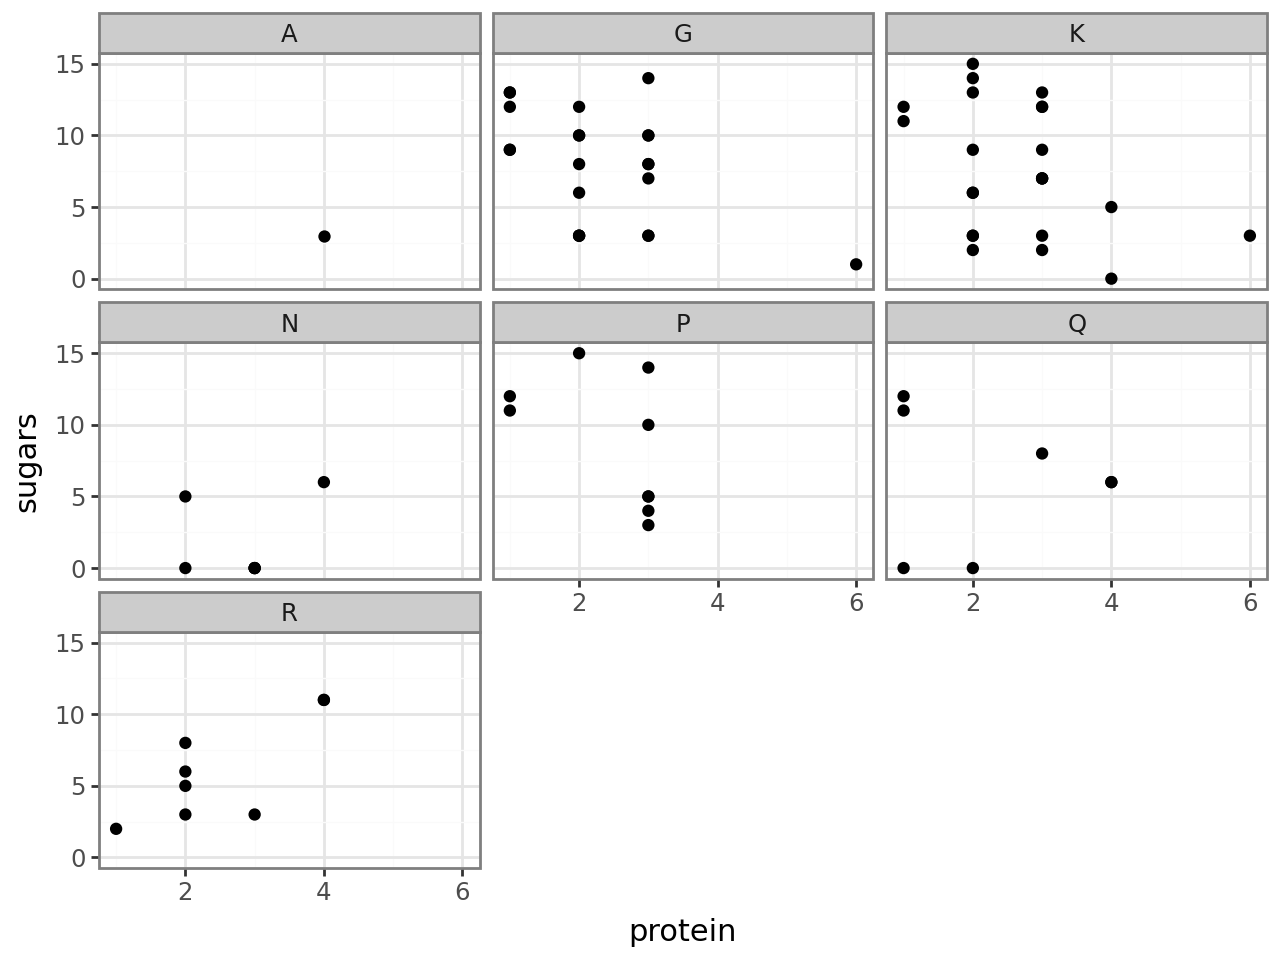

In [21]:
#facet wrap/grid
(ggplot(cereal, aes(x = "protein", y = "sugars")) + geom_point() + theme_bw() +
facet_wrap("~mfr"))

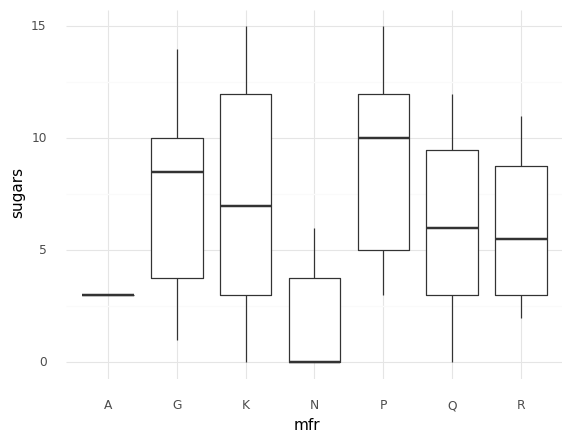

<ggplot: (-9223372036513872580)>

In [ ]:
(ggplot(cereal, aes(x = "mfr", y = "sugars")) + geom_boxplot() + theme_minimal())

# In Your Groups
1. Load the necessary libraries (pandas, plotnine)

2. Load the following dataset `Fifa = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/players_15.csv")`. For more info about this data, check out [this link.](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset/version/1#)

3. How old is the average player in FIFA20? Use plotnine/ggplot to plot a histogram of their ages.

4. Do right footed players weigh more than left footed players? Use ggplot/plotnine to make a graph to answer this question.

5. Is there a difference in height between the clubs Chelsea and Manchester United? Use ggplot/plotnine to make a graph to answer this question.

6. Is there a difference in the relationship between height and weight for people born in each of the 12 months? Use ggplot/plotnine to make a graph to answer this question. (see code below on how to extract the month from the column `fifa[dob]`)

7. Is there an averaged weight difference between players with different `body_type`s? Use ggplot/plotnine to make a graph to answer this question. Discuss what kind of plot would best communicate this information in your opinion.

8. Calculate a new column `bmi` for the fifa dataset. The formula for BMI is below. Note: Body Mass Index (BMI) is not a universal metric of health, and should NOT be taken as such. Use ggplot/plotnine to plot a histogram of the different BMIs in the dataset. Add a dashed line using `+ geom_vline(xintercept = mean, linetype = "dashed", size = 3)` where mean is the mean BMI for the whole dataset.

$$ BMI = \frac{weight(kg)}{height(m)^2}$$

9. What is the relationship between height and weight for each `body_type`? Use `facet_wrap()` to make a separate height/weight scatterplot for each body type.

10. Is there an association between jersey number and age?  Use ggplot/plotnine to make a graph to answer this question.

11. Create a column in `fifa` called `name_len` that counts the number of characters in each player's `long_name` (spaces shouldn't count). Then use ggplot/plotnine to create a histogram of `name_len` and add `+theme_minimal()` to your graph. What is the typical range of name length?


In [23]:
fifa = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/players_15.csv")

# get month of date of birth
fifa["monthBorn"] = fifa["dob"].str.extract(r'-([0-9][0-9])-')
fifa

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,monthBorn
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,06
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,02
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,01
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,10
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0,09
15461,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0,06
15462,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,46+0,46+0,46+0,48+0,51+0,53+0,53+0,53+0,51+0,07
15463,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0,04
